<a href="https://colab.research.google.com/github/Delcapa/BDA_6th/blob/main/Feature(230820).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필수과제1
* 다른 변수를 사용해서 전처리를 진행
* 실제로 전처리를 하여 기존의 0.782보다 더 높은 성능을 만들기

* 이번 과제는 분석 리포팅을 해야 하는 과정에서 잘 하고 있는지 못하는지에 대한 평가 기준이 됩니다. 다음 시간에는 본인들의 스코어와 전처리 한 방법을 질문할 예정

### 과제 데이터 설명
* age 연령
* workclass 고용형태
* education 학력
* education-num 교육연수
* marital-status 혼인상태
* occupation 직업
* relationshop 가족관계
* race 인종
* sex 성별
* capital-gain 자산 증가분
* capital-loss 자산 감소분
* hours-per-week 주당 노동 시간
* native-country 국적
* class target 연봉 기준점 이상 1,0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/salary_class.csv")
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### 베이스 모델 만들기

In [ ]:
df_base = df[["age","education-num","sex","hours-per-week", "native-country","class"]]
df_base

,age,education-num,sex,hours-per-week,native-country,class
0,25,7,Male,40,United-States,0
1,38,9,Male,50,United-States,0
2,28,12,Male,40,United-States,1
3,44,10,Male,40,United-States,1
4,18,10,Female,30,United-States,0
...,...,...,...,...,...,...
48837,27,12,Female,38,United-States,0
48838,40,9,Male,40,United-States,1
48839,58,9,Female,40,United-States,0
48840,22,9,Male,20,United-States,0


In [ ]:
# 결측치는 일단 제거하는 방향으로 처리
df_base.dropna(inplace=True)

<ipython-input-42-ea3b886cc176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.dropna(inplace=True)


In [ ]:
#기본 베이스 라인 모델을 모델링해보자
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   education-num   47985 non-null  int64 
 2   sex             47985 non-null  object
 3   hours-per-week  47985 non-null  int64 
 4   native-country  47985 non-null  object
 5   class           47985 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.6+ MB


In [ ]:
df_base = pd.get_dummies(df_base)

In [ ]:
df_base.columns

Index(['age', 'education-num', 'hours-per-week', 'class', 'sex_Female',
       'sex_Male', 'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Germany', 'native-country_Greece',
       'native-country_Guatemala', 'native-country_Haiti',
       'native-country_Holand-Netherlands', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary', 'native-country_India',
       'native-country_Iran', 'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-cou

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_base.drop("class", axis=1), df_base["class"], test_size = 0.4, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
# 정확도는 0.78

0.7825362092320517

### 모델링

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       46043 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum()
# workclass, occupation, native-country에 결측치가 존재함을 확인

Unnamed: 0           0
age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

#### NA 체크

In [ ]:
df[df.isna().sum(axis=1)>0] # 결측치가 존재하는 row를 확인

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
6,6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,0
13,13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,0
19,19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,1
22,22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
48812,48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
48820,48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
48822,48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


<ipython-input-68-6698648e322a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], bins=20)


<Axes: xlabel='age', ylabel='Density'>

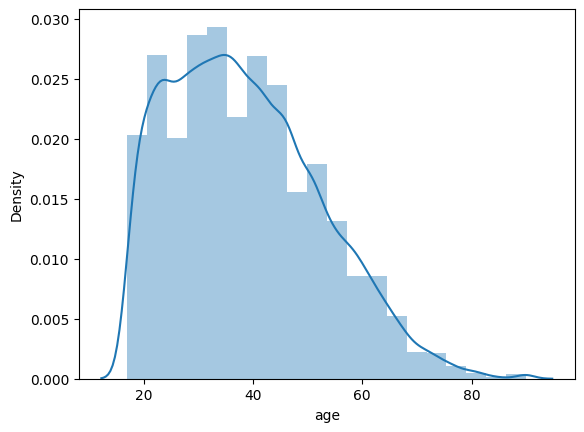

In [ ]:
sns.distplot(df["age"], bins=20)
# age가 좌편향되어있음

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

#np.log로 변환 수행하는 변형 객체 transformer 생성
transformer = FunctionTransformer(np.log)

# 데이터 스케일링 진행
age_scaled = transformer.transform(df["age"])

#스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
age_df_scaled = pd.DataFrame(data=age_scaled)

age_df_scaled = age_df_scaled.replace(-np.inf, 0)
# log 0의 값이 마이너스 무한대가 나오므로 0값으로 대체해준다

age_df_scaled
# 데이터 구간 변경 확인

,age
0,3.218876
1,3.637586
2,3.332205
3,3.784190
4,2.890372
...,...
48837,3.295837
48838,3.688879
48839,4.060443
48840,3.091042


<ipython-input-70-60bed81234b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_df_scaled["age"], bins=20)


<Axes: xlabel='age', ylabel='Density'>

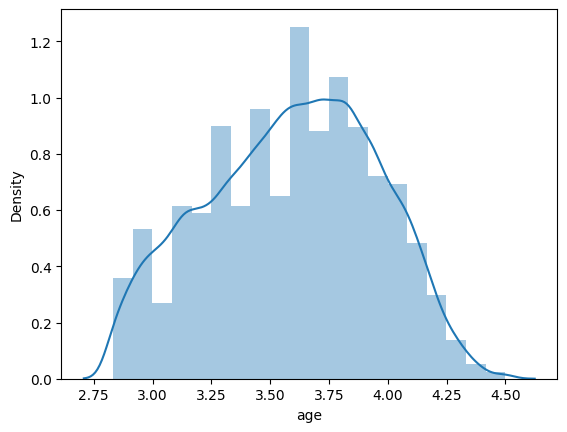

In [ ]:
sns.distplot(age_df_scaled["age"], bins=20)
# log변환을 통해 분포가 완화됨

In [ ]:
df.groupby("workclass")["class"].mean()
# workclass에 따른 class 평균

workclass
Federal-gov         0.391760
Local-gov           0.295599
Never-worked        0.000000
Private             0.217867
Self-emp-inc        0.553392
Self-emp-not-inc    0.278871
State-gov           0.267542
Without-pay         0.095238
Name: class, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'State-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

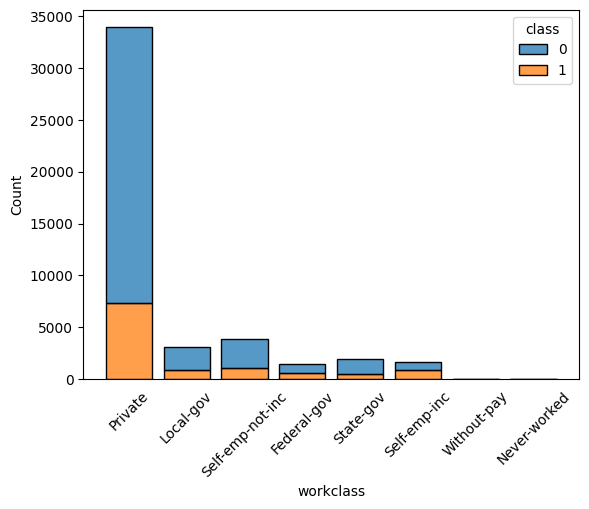

In [ ]:
ax = sns.histplot(x='workclass', hue='class',
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=0.8, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기
plt.xticks(rotation=45)
# workclass에 따른 임금자들의 비율

In [ ]:
df.groupby("education-num")["class"].mean()
# 교육연수에 따른 class 평균

education-num
1     0.012048
2     0.032389
3     0.053045
4     0.064921
5     0.054233
6     0.062635
7     0.050773
8     0.073059
9     0.158578
10    0.189649
11    0.253275
12    0.257964
13    0.412835
14    0.549116
15    0.739808
16    0.725589
Name: class, dtype: float64

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

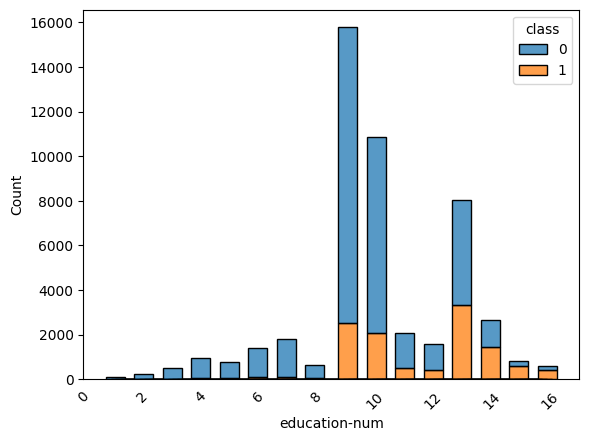

In [ ]:
ax = sns.histplot(x='education-num', hue='class',
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=4, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기
plt.xticks(rotation=45)
# 교육연수에 따른 임금자들의 비율

* 9년 이상 교육자들부터는 고임금자가 많음을 확인

In [ ]:
df.groupby("marital-status")["class"].mean()
# 혼인 상태에 따른 class 평균
# Married-civ-spouse: a civilian spouse
# Married-AF-spouse: a spouse in the Armed Forces

marital-status
Divorced                 0.101161
Married-AF-spouse        0.378378
Married-civ-spouse       0.446133
Married-spouse-absent    0.092357
Never-married            0.045480
Separated                0.064706
Widowed                  0.084321
Name: class, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

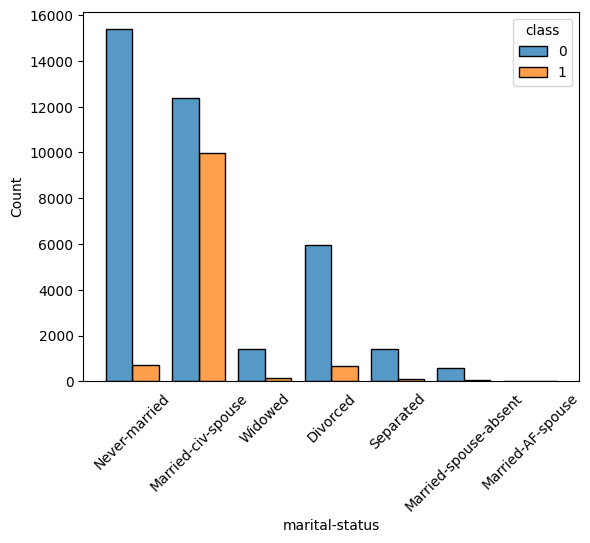

In [ ]:
ax = sns.histplot(x='marital-status', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기
plt.xticks(rotation=45)

In [ ]:
df.groupby("occupation")["class"].mean()

occupation
Adm-clerical         0.136874
Armed-Forces         0.333333
Craft-repair         0.226276
Exec-managerial      0.477818
Farming-fishing      0.116107
Handlers-cleaners    0.066602
Machine-op-inspct    0.123097
Other-service        0.041438
Priv-house-serv      0.012397
Prof-specialty       0.451069
Protective-serv      0.313327
Sales                0.267987
Tech-support         0.290456
Transport-moving     0.204246
Name: class, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Prof-specialty'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Adm-clerical'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Tech-support'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'Priv-house-serv'),
  Text(11, 0, 'Transport-moving'),
  Text(12, 0, 'Handlers-cleaners'),
  Text(13, 0, 'Armed-Forces')])

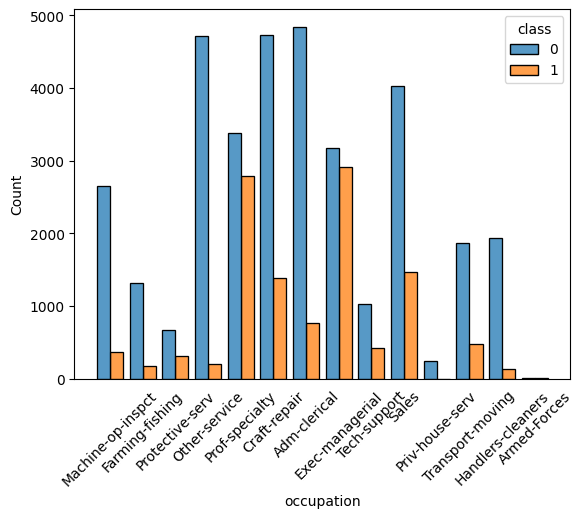

In [ ]:
ax = sns.histplot(x='occupation', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기
plt.xticks(rotation=45)
# 직업별 차이가 있음

In [ ]:
df.groupby("relationship")["class"].mean()

relationship
Husband           0.448671
Not-in-family     0.101407
Other-relative    0.034529
Own-child         0.014642
Unmarried         0.060293
Wife              0.468897
Name: class, dtype: float64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Own-child'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Not-in-family'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

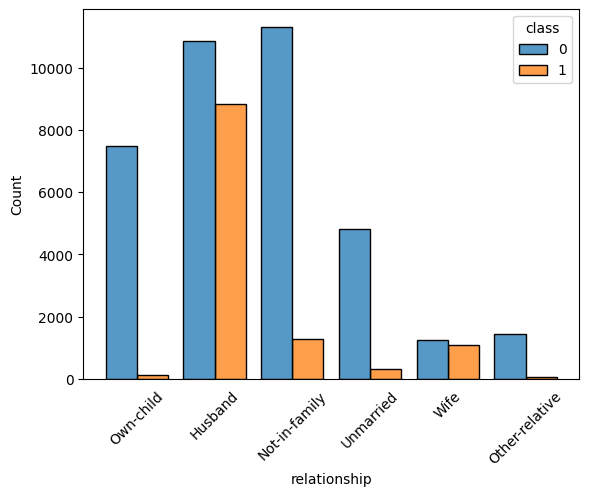

In [ ]:
ax = sns.histplot(x='relationship', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기
plt.xticks(rotation=45)
# realtionship별로 차이가 있음

In [ ]:
df.groupby("race")["class"].mean()

race
Amer-Indian-Eskimo    0.117021
Asian-Pac-Islander    0.269256
Black                 0.120811
Other                 0.123153
White                 0.253987
Name: class, dtype: float64

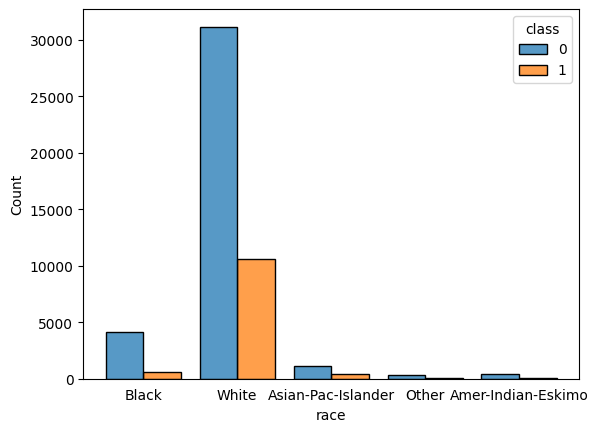

In [ ]:
ax = sns.histplot(x='race', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기

* race를 white와 asia를 major로 balck, amer, other을 minor로 분류

In [ ]:
df.groupby("sex")["class"].mean()

sex
Female    0.109251
Male      0.303767
Name: class, dtype: float64

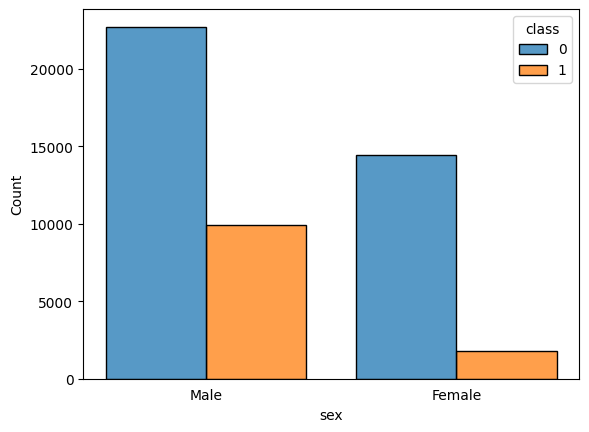

In [ ]:
ax2 = sns.histplot(x='sex', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df)
ax2.tick_params(bottom=False)

* 성별에 따른 class값의 유의미한 차이가 있음

* capital-gain, capital-loss는 제외

In [ ]:
df.groupby("hours-per-week")["class"].mean()

hours-per-week
1     0.111111
2     0.226415
3     0.050847
4     0.071429
5     0.094737
        ...   
95    0.500000
96    0.111111
97    0.500000
98    0.214286
99    0.299270
Name: class, Length: 96, dtype: float64

<ipython-input-71-4a9e19e6eda6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["hours-per-week"], bins=20)


<Axes: xlabel='hours-per-week', ylabel='Density'>

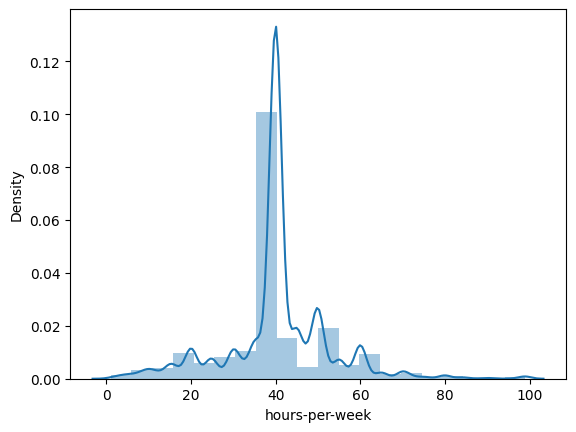

In [ ]:
sns.distplot(df["hours-per-week"], bins=20)
# 편향되어있지는 않음

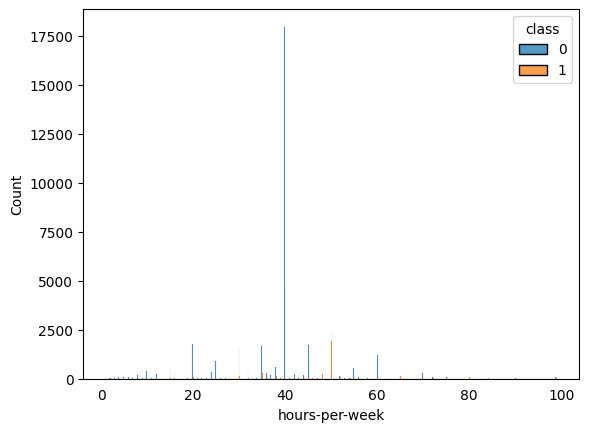

In [ ]:
ax2 = sns.histplot(x='hours-per-week', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=1, # 막대 사이 간격 조정
                  data=df)
ax2.tick_params(bottom=False)

<Axes: xlabel='hours-per-week', ylabel='count'>

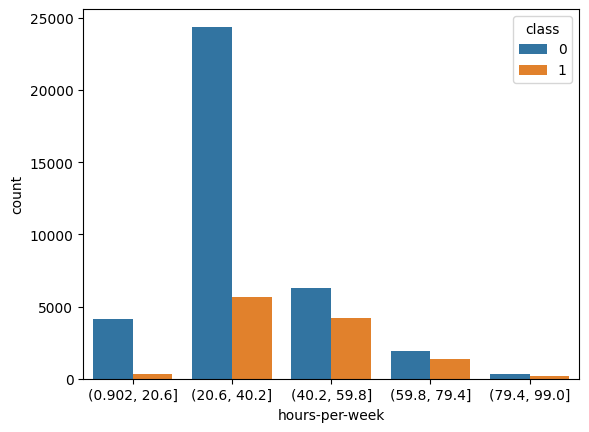

In [ ]:
sns.countplot(x= pd.cut(df["hours-per-week"],5), hue ="class", data=df)
# 오랜 시간 일하는 노동자의 경우 1의 비율이 높음을 확인

In [ ]:
df.groupby("native-country")["class"].mean()

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Peru'),
  Text(2, 0, 'Guatemala'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'Dominican-Republic'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Philippines'),
  Text(8, 0, 'Thailand'),
  Text(9, 0, 'Haiti'),
  Text(10, 0, 'El-Salvador'),
  Text(11, 0, 'Puerto-Rico'),
  Text(12, 0, 'Vietnam'),
  Text(13, 0, 'South'),
  Text(14, 0, 'Columbia'),
  Text(15, 0, 'Japan'),
  Text(16, 0, 'India'),
  Text(17, 0, 'Cambodia'),
  Text(18, 0, 'Poland'),
  Text(19, 0, 'Laos'),
  Text(20, 0, 'England'),
  Text(21, 0, 'Cuba'),
  Text(22, 0, 'Taiwan'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Canada'),
  Text(25, 0, 'Portugal'),
  Text(26, 0, 'China'),
  Text(27, 0, 'Nicaragua'),
  Text(28, 0, 'Honduras'),
  Text

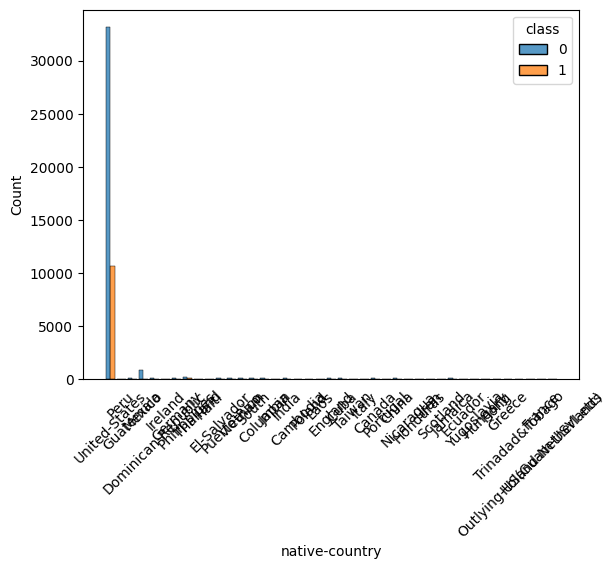

In [ ]:
ax = sns.histplot(x='native-country', hue='class',
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df)
ax.tick_params(bottom=False) # x축 눈금 숨기기
plt.xticks(rotation=45)
# native-country는 제외

### 변수 최소화 및 피처엔지니어링

In [ ]:
df_base2= df[['workclass','education-num','marital-status','occupation','relationship','race','sex','hours-per-week','class']]
df_base2

,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class
0,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
4,NaN,10,Never-married,NaN,Own-child,White,Female,30,0
...,...,...,...,...,...,...,...,...,...
48837,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
48838,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
48839,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0
48840,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [ ]:
# age는 사전에 로그스케일링한것으로 대체
age_df_scaled

,age
0,3.218876
1,3.637586
2,3.332205
3,3.784190
4,2.890372
...,...
48837,3.295837
48838,3.688879
48839,4.060443
48840,3.091042


In [ ]:
df_base2_f = pd.concat([age_df_scaled,df_base2],axis=1)

In [ ]:
df_base2_f

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class
0,3.218876,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,3.637586,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,3.332205,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,3.784190,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
4,2.890372,NaN,10,Never-married,NaN,Own-child,White,Female,30,0
...,...,...,...,...,...,...,...,...,...,...
48837,3.295837,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
48838,3.688879,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
48839,4.060443,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0
48840,3.091042,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [ ]:
# marital-status 컬럼을 Married와 Others로 분리
df_base2_f.replace({"marital-status": "Married-civ-spouse"}, "Married", inplace=True)
df_base2_f.replace({"marital-status": "Married-AF-spouse"}, "Married", inplace=True)
df_base2_f.replace({"marital-status": "Divorced"}, "Others", inplace=True)
df_base2_f.replace({"marital-status": "Married-spouse-absent"}, "Others", inplace=True)
df_base2_f.replace({"marital-status": "Never-married"}, "Others", inplace=True)
df_base2_f.replace({"marital-status": "Separated"}, "Others", inplace=True)
df_base2_f.replace({"marital-status": "Widowed"}, "Others", inplace=True)

In [ ]:
df_base2_f["relationship"].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [ ]:
# relationship 컬럼을 spouse와 non-spouse로 분리
df_base2_f.replace({"relationship": "Own-child"}, "non-spouse", inplace=True)
df_base2_f.replace({"relationship": "Husband"}, "spouse", inplace=True)
df_base2_f.replace({"relationship": "Not-in-family"}, "non-spouse", inplace=True)
df_base2_f.replace({"relationship": "Unmarried"}, "non-spouse", inplace=True)
df_base2_f.replace({"relationship": "Wife"}, "spouse", inplace=True)
df_base2_f.replace({"relationship": "Other-relative"}, "non-spouse", inplace=True)

In [ ]:
df_base2_f["relationship"].unique()

array(['non-spouse', 'spouse'], dtype=object)

In [ ]:
# race 컬럼을 major와 minor로 분리
df_base2_f.replace({"race": "Black"}, "minor", inplace=True)
df_base2_f.replace({"race": "White"}, "major", inplace=True)
df_base2_f.replace({"race": "Asian-Pac-Islander"}, "major", inplace=True)
df_base2_f.replace({"race": "Other"}, "minor", inplace=True)
df_base2_f.replace({"race": "Amer-Indian-Eskimo"}, "minor", inplace=True)

In [ ]:
# hours-per-week를 5구간으로 나누기
df_base2_f["hours-per-week"] = pd.cut(df["hours-per-week"],5, labels=["hour<20.6", "hour<40.2","hour<59.8", "hour<79.4", "hour<99.0"])
df_base2_f

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class
0,3.218876,Private,7,Others,Machine-op-inspct,non-spouse,minor,Male,hour<40.2,0
1,3.637586,Private,9,Married,Farming-fishing,spouse,major,Male,hour<59.8,0
2,3.332205,Local-gov,12,Married,Protective-serv,spouse,major,Male,hour<40.2,1
3,3.784190,Private,10,Married,Machine-op-inspct,spouse,minor,Male,hour<40.2,1
4,2.890372,NaN,10,Others,NaN,non-spouse,major,Female,hour<40.2,0
...,...,...,...,...,...,...,...,...,...,...
48837,3.295837,Private,12,Married,Tech-support,spouse,major,Female,hour<40.2,0
48838,3.688879,Private,9,Married,Machine-op-inspct,spouse,major,Male,hour<40.2,1
48839,4.060443,Private,9,Others,Adm-clerical,non-spouse,major,Female,hour<40.2,0
48840,3.091042,Private,9,Others,Adm-clerical,non-spouse,major,Male,hour<20.6,0


In [ ]:
df_base2_fd = pd.get_dummies(df_base2_f)

In [ ]:
df_base2_fd.columns

Index(['age', 'education-num', 'class', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Married', 'marital-status_Others',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_non-spouse', 'relationship_spouse', 'race_major',
       'race_minor', 'sex_Female', 'sex_Male', 'hours-per-week_hour<20.6',
       'hours-per-week_hour<40.2', 'hours-per-week_hour<59.8',
       'hours-per-week_h

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_base2_fd.drop("class", axis=1), df_base2_fd["class"], test_size = 0.4, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7908583712954906

### 결과

* 'age', 'workclass','education-num','marital-status','occupation','relationship','race','sex','hours-per-week' 컬럼들이 'class'에 영향을 준다고 생각하였다

* age의 경우는 로그스케일링
* martial-status은 married, others로 분리
* realtionship은 spouse와 non-spouse로 분리
* race는 major, minor로 분리
* hours-per-week는 5개 그룹으로 분리하였다


* 인코딩 전: 0.7827967073043659
* 인코딩 후: 0.7908583712954906

* 인코딩 결과: 0.008061663991124735정도의 정확도가 상승하였다.
* 기존의 base 모델보다도 많은 변수를 추가하였음에도 정확도가 상승하였다!